<a href="https://colab.research.google.com/github/lexvieira/Nasa_Image_View/blob/main/Nasa_Image_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nasa View Pictures
  

## Type a date of a picture of nasa between June 16 1995 or later than today

> ### You can opt to show the info about the picture insert Y at the question 
> Do you want to see the info about the picture?


## Run the code clicking on Run above or type Ctrl + Enter on your Keyboard

Informe a date between June 16 1995 and today to get your Nasa Picture (MM-DD-YYYY) or S for a surprise date: 01-01-2000
Do you want to see the info about the picture? Y/N: Y
Image date: Jan 01, 2000
Query URL: https://api.nasa.gov/planetary/apod?api_key=UxwErgpXE5UEF6qibaZUcHB4ap5KKoZunecx7th8&date=2000-01-01
Image title: The Millennium that Defines Universe
Image Date: 2000-01-01


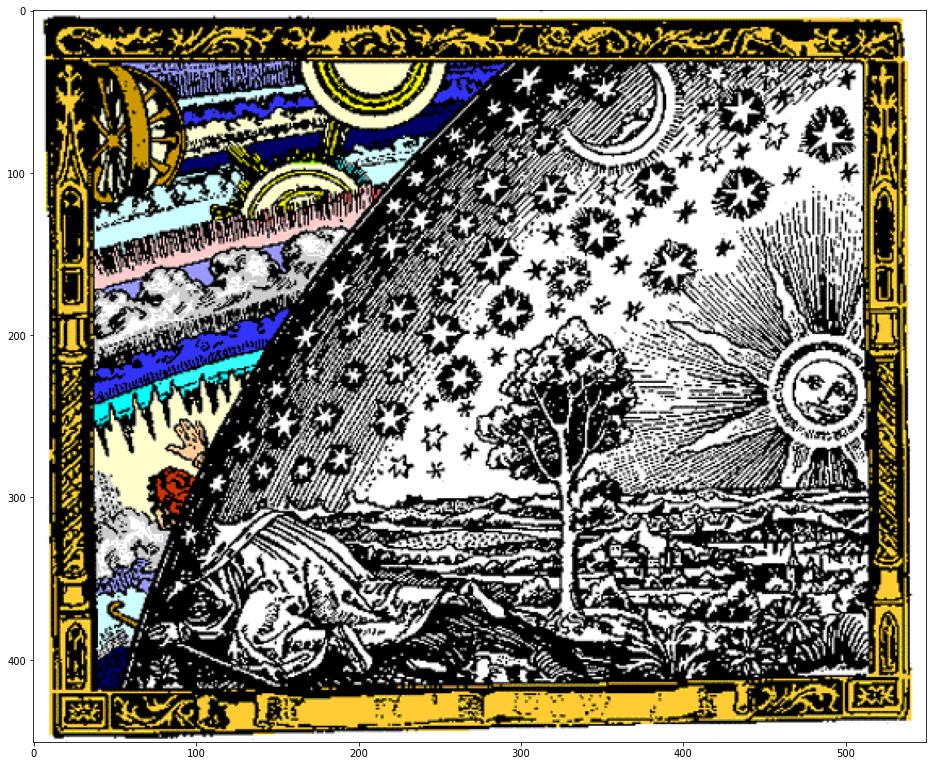

In [2]:
import argparse
from datetime import date, timedelta
from random import randint
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg


def create_date(datelist, surprise):
    """
    Create a valid date object.
    
    OK If datelist is not an empty list, create a date object using the data in the list [month day year].
    If datelist is empty, and surprise is True, create a random date object between June 16 1995 and today.
    If datelist is empty and surprise is False, create a date object using yesterday's date
    
    If the datelist contain invalid information (i.e. month = 1323), the function should return None
    If the created date is invalid (i.e. earlier than June 16 1995 or later than today), the function should return None
    
    HINTS: 
        - Use exception handling to validate the info in the datelist
        - Use timedelta objects to generate a surprise date
    
    args:
        d: list containing the [month, day, year] or an empty list []
        surprise: Boolean, if True and datelist is empty, generate a random date 
                  the earliest valid date is June 16 1995
    
    returns:
        created valid date object or None when date selected by user is invalid (i.e. in the future)
    """
    
    #TODO: Your code goes here
    if (datelist and surprise) or (datelist and not surprise):
        datepicture = date(month = datelist[0], day = datelist[1], year = datelist[2])
    elif not datelist and surprise:
        start_date = date(month = 6,day = 16, year = 1995)
        today_date = date.today()
        #print(start_date)
        #print(today_date)
        diff_date = today_date - start_date
        #print(diff_date)
        #print(diff_date.days)
        random_day = randint(1, diff_date.days)
        #print(random_day)
        datepicture = start_date + timedelta(days = random_day)
        #print("Surprise Date:", surprise_date)
    elif not datelist and not surprise:
        datepicture = date.today() - timedelta(days = 1)
        correctDate = True
        
    #print("Date Processing:", datepicture)
    return datepicture
    
def query_url(d, api_key):
    """
    Create a URL to fetch an image metadata (not the image itself).
    
    The base URL is https://api.nasa.gov/planetary/apod?
    For a complete URL, the api_key and the date (d) (formatted as YYYY-MM-DD) should be added to the base.
    For example, if date object (d) represents July 5 2016 and api_key is DEMO_KEY, the complete URL is:
    
    https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY&date=2016-07-05
    
    HINTS: 
        - Use strftime to format the date object (d) as necessary
    
    args:
        d: date object containing a valid date
        api_key: string containing "DEMO_KEY" or your valid NASA developer key for higher request rate limits
        
    returns:
        complete url as a string
        
    examples:
        d is a date object representing Sep 24 2017
        query_url(d, "DEMO_KEY") ==> returns https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY&date=2017-09-24
        
        d is a date object representing Jul 19 1999
        query_url(d, "ABCDEFG") ==> returns https://api.nasa.gov/planetary/apod?api_key=ABCDEFG&date=1999-07-19
    """
        
    #TODO: Your code goes here
    url = "https://api.nasa.gov/planetary/apod?api_key=" + str(api_key) + "&date=" + d.strftime("%Y-%m-%d")
    return url

def save_image(d, image):
    """
    Save binary image on disk.
    
    Use the date of the image (d) to create a directory structure (year/month) if it doesn't exist already,
    then save the binary image under its corresponding year and month using the date (d) + '.jpg' as a file name
    
    HINT: Binary data can be written to files in a similar way to how strings are written to files.
          Use 'wb' (write binary) instead of 'w' in the file open clause (i.e. open(file_path, 'wb'))

    args:
        d: date object containing image date
        image: binary image itself
    
    returns:
        file_path: where the image was saved
        
    examples:
        if d = 2017-8-21, the image will be saved as: 2017/8/2017-8-21.jpg
        if d = 1998-4-15, the image will be saved as: 1998/4/1998-4-15.jpg
    """
    
    #TODO: Your code goes here
    year = int(d.year)
    month = int(d.month)
    
    if not (os.path.exists(str(year))):
        os.mkdir(str(year))        

    if not (os.path.exists(str(year) + "/" + str(month))):
        os.mkdir(str(year) + "/" + str(month))
    
    file_path = str(year) + "/" + str(month) + "/" + str(d) + ".jpg"
    
    try:
        with open(file_path, 'wb') as file:
            file.write(image)
    except Exception as exception_object:
        print("Error Writing File " + str(d) + ".jpg", exception_object)
    
    os.listdir(str(year) + "/" + str(month))
    
    
       
    return file_path
    
def show_image(img_url):   

    # create a file-like object from the url
    img_read = urllib.request.urlopen(img_url)
    
    fig = plt.figure(figsize=(16, 16))    
    #print("Reading Image")
    img = mpimg.imread(img_read, 0)
    #print("Plotting Image")
    imgplot = plt.imshow(img)
    
def request(url):
    """
    Download the metadata located at url and return it as a dictionary.
     
    args:
        url: to request image metadata for a specific date
    
    returns:
        dictionary of the metadata downloaded from url
        
    examples:
        if url = "https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY&date=2017-09-24"
        url_request(url) ==> returns dictionary:
        
        {
          "copyright": "The League of Lost Causes", 
          "date": "2017-09-24", 
          "explanation": "What is that light in the sky? Perhaps one of humanity's more common questions, an answer may result from a few quick observations.  For example -- is it moving or blinking? If so, and if you live near a city, the answer is typically an airplane, since planes are so numerous and so few stars and satellites are bright enough to be seen over the din of artificial city lights. If not, and if you live far from a city, that bright light is likely a planet such as Venus or Mars -- the former of which is constrained to appear near the horizon just before dawn or after dusk.  Sometimes the low apparent motion of a distant airplane near the horizon makes it hard to tell from a bright planet, but even this can usually be discerned by the plane's motion over a few minutes. Still unsure?   The featured chart gives a sometimes-humorous but mostly-accurate assessment.  Dedicated sky enthusiasts will likely note -- and are encouraged to provide -- polite corrections.   Chart translations: Spanish, Italian, Polish, Tamil, Kannada, Latvian, and Norwegian", 
          "hdurl": "https://apod.nasa.gov/apod/image/1709/astronomy101_hk_750.jpg", 
          "media_type": "image", 
          "service_version": "v1", 
          "title": "How to Identify that Light in the Sky", 
          "url": "https://apod.nasa.gov/apod/image/1709/astronomy101_hk_960.jpg"
        }
        
    """
    
    # request the content of url and save the retrieved binary data
    with urllib.request.urlopen(url) as response:
        data = response.read()
    
    # convert data from byte to string
    data = data.decode('UTF-8')
    
    # convert data from string to dictionary
    data = eval(data)
    return data

def download_image(url):
    """
    Download the image located at url.
    
    args:
        url: where actual image is located
        
    returns:
        image as binary data
    """
    
    # request the content of url and return the retrieved binary image data
    with urllib.request.urlopen(url) as response:
        image = response.read()
    return image

def main():
    # NASA developer key (You can hardcode yours for higher request rate limits!)
    API_KEY = "UxwErgpXE5UEF6qibaZUcHB4ap5KKoZunecx7th8" #ALEX
    #API_KEY = "cZX0zRDveiz7AfGfOW23typMH3NCnS3uvQJc0ZNS" #DEFAULT
    # parse command line arguments
    #args = parse_command_line()
    
    args = {}
    
    args["api_key"] = None
    
    args["date"] = input("Informe a date between June 16 1995 and today to get your Nasa Picture (MM-DD-YYYY) or ""S"" for a surprise date: ")
    
    if args["date"].upper() == "S":
        args["surprise"] = True
        args["date"] = []
    else:
        args["date"] = list(map(int,args["date"].split("-")))
        args["surprise"] = False
    
    args["verbose"] = input("Do you want to see the info about the picture? Y/N: ")
    
    # update API_KEY if passed on the command line
    if (args["api_key"] != None):
        API_KEY = args["api_key"]
    
    # create a request date
    d = create_date(args["date"], args["surprise"])
    
    # ascertain a valid date was created, otherwise exit program
    if d is None:
        print("No valid date selected!")
        exit()
    
    # verbose mode
    if args["verbose"].upper() == "Y":
        print("Image date: {}".format(d.strftime("%b %d, %Y")))
        
    # generate query url
    url = query_url(d, API_KEY)

    # verbose mode    
    if args["verbose"].upper() == "Y":
        print("Query URL: {}".format(url))
        
    # download the image metadata as a Python dictionary
    metadata = request(url)

    # verbose mode    
    if args["verbose"].upper() == "Y":
        # display image title, other metadata can be shown here
        print("Image title: {}\nImage Date: {}".format(metadata['title'],metadata['date']))
    
    # get the url of the image data from the dictionary
    image_url = metadata['url']

    # verbose mode    
    if args["verbose"].upper() == "Y":
        print("Downloading image from:", image_url)
        
    # download the image itself (the returned info is binary)
    #image = download_image(image_url)
    
    # save the downloaded image into disk in (year/month)
    # the year and month directories correspond to the date of the image (d)
    # the file name is the date (d) + '.jpg'
    #file_path = save_image(d, image)

    show_image(image_url)
    
    #print("Image saved")
    
    plt.show()    

#if __name__ == '__main__':
main()
    
